# Manually Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [4]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [5]:
n=len(X)

In [6]:
numerator=0
dinom=0

In [7]:
for i in range(n):
    numerator += (X[i]-mean_x)*(Y[i]-mean_y)
    dinom +=(X[i]-mean_x)**2
slope=numerator/dinom #m
coff=mean_y-(slope* mean_x) #c
print(slope)
print(coff)

0.26342933948939945
325.57342104944223


In [8]:
#max_x=np.max(X)+100
#min_x=np.min(X)-100
#x=np.linspace(min_x,max_x,1000)
y_predict=coff+slope*X

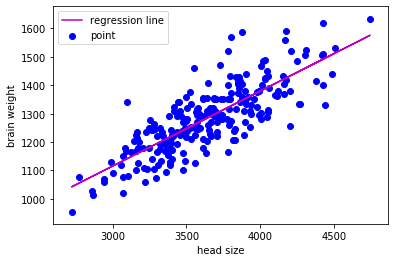

In [9]:
plt.plot(X,y_predict,c='m',label="regression line") # x vs predicted
plt.scatter(X,Y,c='b',label="point")  # x vs actual
plt.legend()
plt.xlabel("head size")
plt.ylabel("brain weight")
plt.show()

In [10]:
#calculate r square error
numerror=0
dinoerror=0
for i in range(n):
    numerror += (y_predict[i]-mean_y)**2
    dinoerror += (Y[i]-mean_y)**2
numerror/dinoerror    

0.6393117199570001

# using Sklearn

#  linear regression

In [11]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [12]:
x_actual=data['Head Size(cm^3)'].values #independent variable
y_actual=data['Brain Weight(grams)'].values  # dependent variable

In [13]:
x_actual=x_actual.reshape(n,1) # x should be 2D arary
linearmodel = LinearRegression() # use linear regression

In [14]:
linearmodel = linearmodel.fit(x_actual, y_actual) #fit the model

In [15]:
print('intercept:', linearmodel.intercept_) # find the intercept
print('slope:', linearmodel.coef_) #find the coffiecent

intercept: 325.5734210494428
slope: [0.26342934]


In [16]:
y_pred = linearmodel.predict(x_actual) #predicted value of y

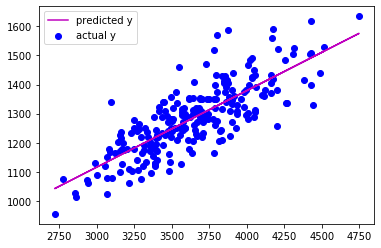

In [17]:
plt.scatter(x_actual,y_actual,c='b',label="actual y")
plt.plot(x_actual,y_pred,c='m',label="predicted y")
plt.legend()

In [18]:
r2score=linearmodel.score(x_actual,y_actual)
print(r2score)

0.639311719957


# Multiple Linear Regression

In [19]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [20]:
x_actual=data[['Gender' , 'Age Range', 'Head Size(cm^3)']].values

In [21]:
y_actaul=data['Brain Weight(grams)'].values

In [22]:
linearmodel = LinearRegression()
#fit data fro more than one dependent
linearmodel = linearmodel.fit(x_actual, y_actual)
print('intercept:', linearmodel.intercept_)
print('slope:', linearmodel.coef_)
y_pred = linearmodel.predict(x_actual) #predicted value for y

intercept: 464.5628108859082
slope: [-22.5432537  -23.96844543   0.24421175]


In [23]:
# r square error
r2score=linearmodel.score(x_actual,y_actual)
print(r2score)

0.6528346387526653


In [24]:
prediction=linearmodel.predict([[1,1,4512]])

In [25]:
prediction

array([1519.93452386])

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [11]:
data=pd.read_csv('heart7.csv')

In [12]:
data.head()

,age,Gender,Family,diet,Lifestyle,cholestrol,heartdisease
0,0,0,1,1,3,0,1
1,0,1,1,1,3,0,1
2,1,0,0,0,2,1,1
3,4,0,1,1,3,2,0
4,3,1,1,0,0,2,0


In [18]:
x_actual=data[['age','Gender','Family','diet','Lifestyle','cholestrol']].values

In [19]:
y_actual=data['heartdisease'].values

In [20]:
model=LinearRegression()

In [21]:
model=model.fit(x_actual,y_actual)

In [22]:
model.intercept_,model.coef_

(1.474266962508294,
 array([-0.15497626, -0.32088016, -0.33495822,  0.01648816,  0.00593973,
        -0.19041064]))

In [23]:
y_predict=model.predict(x_actual)

In [24]:
for i in range(len(y_actual)):
    print(y_actual[i], " ",y_predict[i])

1   1.173616093646317
1   0.8527359302422025
1   1.1407595284505636
0   0.17288979553749195
0   -0.027321458195089354
1   0.851784122013935
1   0.531283178500332
1   1.173616093646317
0   -0.027321458195089354
1   0.6175892709024549
1   0.5618493903450563
0   0.17288979553749195
0   0.8434342858327799
1   0.851784122013935
0   0.1630891775879233
1   0.7584874751161246
1   0.8363675244691435
0   0.1795773370106173
0   0.17288979553749195


In [26]:
# r square error
r2score=model.score(x_actual,y_actual)
print(r2score)

0.6437225211088784


In [31]:
model.predict([[0,0,0,0,0,0]])

array([1.47426696])